In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries
from numpy import math
from haversine import haversine
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from datetime import datetime
from pylab import rcParams
import seaborn as sns; sns.set()


In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [7]:
#import the data from a csv file.
path ="./nyc-taxi-trip-duration/train.zip"
nyc_df_train =  pd.read_csv(path)

In [8]:
nyc_df_train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [9]:
#import the data from a csv file.
path ="./nyc-taxi-trip-duration/test.zip"
nyc_df_test =  pd.read_csv(path)

In [21]:
nyc_df_train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [14]:
nyc_df_train.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01      4.073588e+01   3.970000e+02  
50%        -7.397975e+01      4.075452e+01   6.620000e+02  
75%        -7.396301e+01      4.076981e+01   1.075000e+03  
max        -6.133553e+01      4.392103e+01   3.526282e+06

In [16]:
#Check for NaN values
nyc_df_train['trip_duration'].isnull().sum()

0

In [18]:
#Check for duplicated values
nyc_df_train.drop_duplicates(inplace=True)
nyc_df_train.shape

(1458644, 11)

In [19]:
nyc_df_train['passenger_count'].value_counts().reset_index()


index  passenger_count
0      1          1033540
1      2           210318
2      5            78088
3      3            59896
4      6            48333
5      4            28404
6      0               60
7      7                3
8      9                1
9      8                1

In [22]:
nyc_df_train[nyc_df_train['passenger_count']==0].count()

id                    60
vendor_id             60
pickup_datetime       60
dropoff_datetime      60
passenger_count       60
pickup_longitude      60
pickup_latitude       60
dropoff_longitude     60
dropoff_latitude      60
store_and_fwd_flag    60
trip_duration         60
dtype: int64

In [23]:
nyc_df_train=nyc_df_train[nyc_df_train['passenger_count']!=0]


In [24]:
nyc_df_train["pickup_datetime"][0]

'2016-03-14 17:24:55'

In [25]:
#Convert timestamp to datetime format to fetch the other details as listed below
nyc_df_train['pickup_datetime']=pd.to_datetime(nyc_df_train['pickup_datetime'])
nyc_df_train['dropoff_datetime']=pd.to_datetime(nyc_df_train['dropoff_datetime'])
nyc_df_train.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [40]:
#Convert timestamp to datetime format to fetch the other details as listed below
nyc_df_test['pickup_datetime']=pd.to_datetime(nyc_df_test['pickup_datetime'])
# nyc_df_test['dropoff_datetime']=pd.to_datetime(nyc_df_test['dropoff_datetime'])
nyc_df_test.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id3004672          1 2016-06-30 23:59:58                1   
1  id3505355          1 2016-06-30 23:59:53                1   
2  id1217141          1 2016-06-30 23:59:47                1   
3  id2150126          2 2016-06-30 23:59:41                1   
4  id1598245          1 2016-06-30 23:59:33                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.988129        40.732029         -73.990173         40.756680   
1        -73.964203        40.679993         -73.959808         40.655403   
2        -73.997437        40.737583         -73.986160         40.729523   
3        -73.956070        40.771900         -73.986427         40.730469   
4        -73.970215        40.761475         -73.961510         40.755890   

  store_and_fwd_flag  
0                  N  
1                  N  
2                  N  
3                  N  
4                  N

[Text(0.5, 1.0, 'Distribution Plot for Trip Duration')]

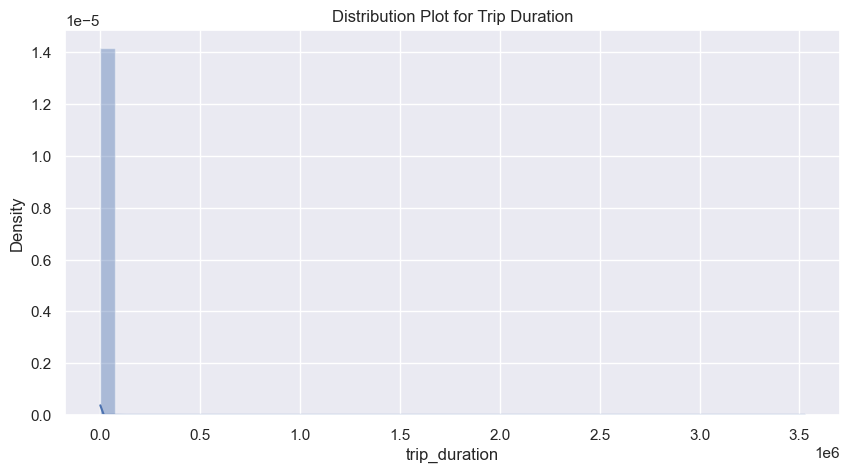

In [26]:
#Dependent variable 'trip_duration'
plt.figure(figsize=(10,5))
sns.distplot(nyc_df_train['trip_duration'],color="b").set(title='Distribution Plot for Trip Duration')

[Text(0.5, 1.0, 'Distribution Plot with Log Transformation for Trip Duration')]

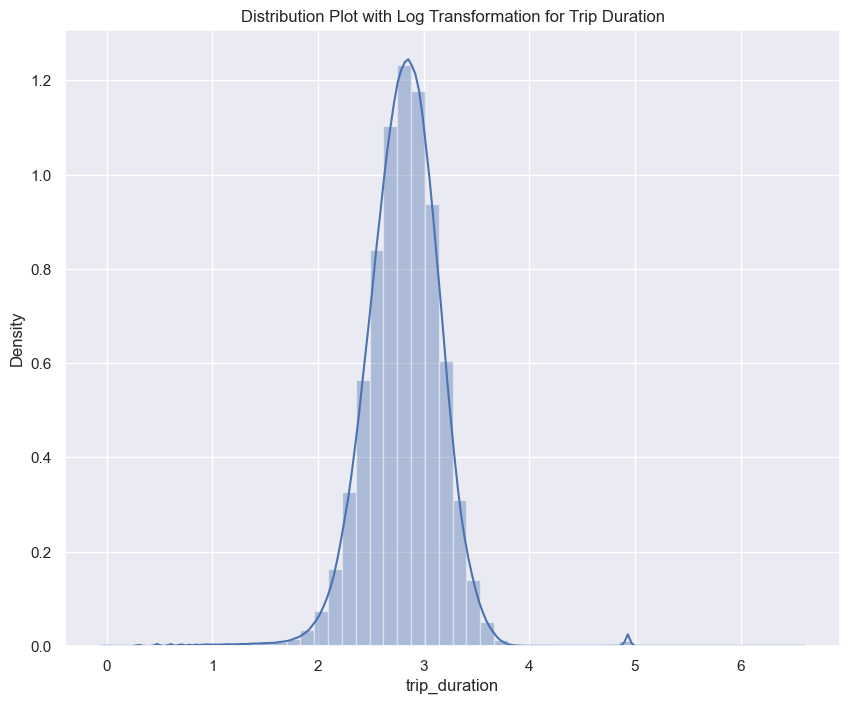

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(nyc_df_train['trip_duration'])).set(title='Distribution Plot with Log Transformation for Trip Duration')

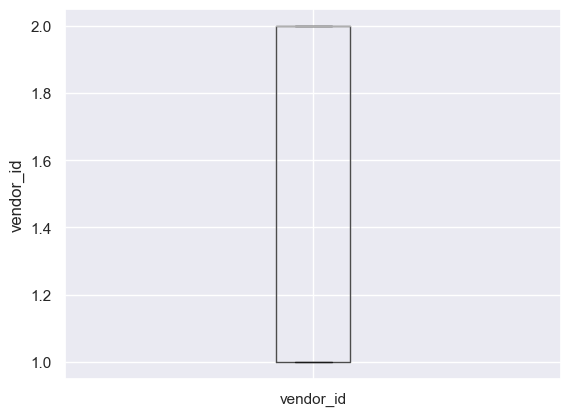

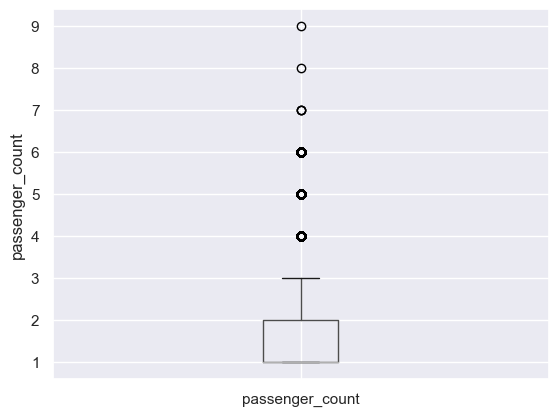

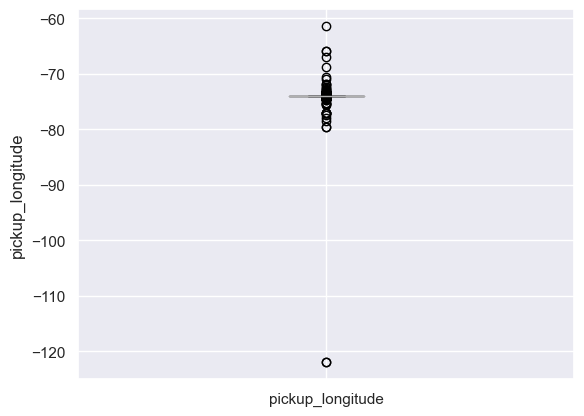

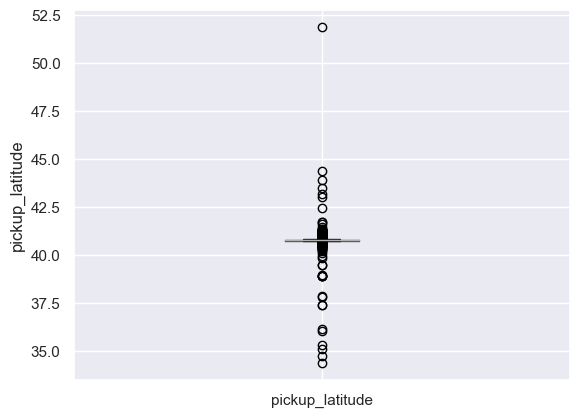

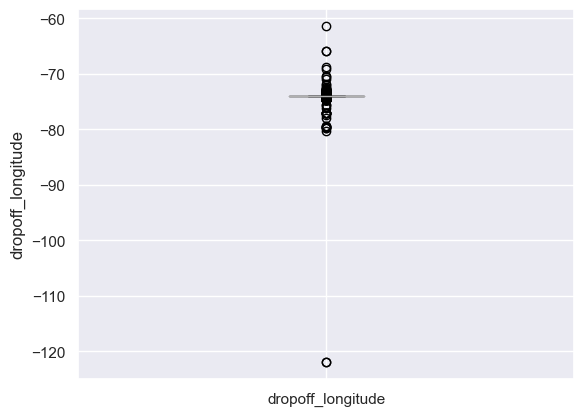

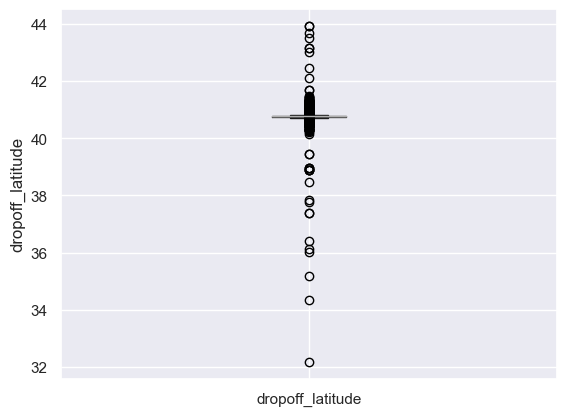

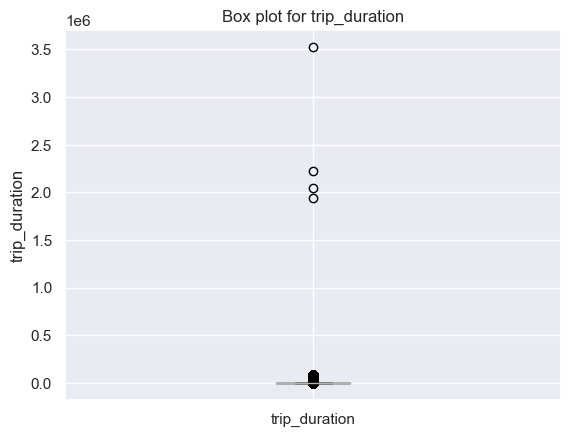

In [30]:
# plot a boxplot for the label by each numerical feature  
for col in nyc_df_train.describe().columns:
    fig = plt.figure()
    ax = fig.gca()
    nyc_df_train.boxplot(column = col, ax = ax)
    ax.set_ylabel(col)
plt.title("Box plot for trip_duration")
plt.show()

In [31]:
# creating a function that will out trip duration from pick and dropoff time
def calculate_trip_duration(pickup,dropoff):
    return (dropoff-pickup).total_seconds()

In [32]:
# creating a feature which stores this calculated trip duration
nyc_df_train['calculate_trip_duration']=nyc_df_train.apply(lambda x: calculate_trip_duration(x['pickup_datetime'],x['dropoff_datetime']),axis=1)

In [33]:
# checking for consistency by comparing trip duration with calculated trip duration
(nyc_df_train['calculate_trip_duration']==nyc_df_train['trip_duration']).value_counts()

True    1458584
dtype: int64

In [35]:
# Dropping the feature created 
nyc_df_train.drop(['calculate_trip_duration'],axis=1,inplace=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'less then 1min'),
  Text(1, 0, 'within 10 mins'),
  Text(2, 0, 'within 30 mins'),
  Text(3, 0, 'within hour'),
  Text(4, 0, 'within day'),
  Text(5, 0, 'within two days'),
  Text(6, 0, 'more then two day')])

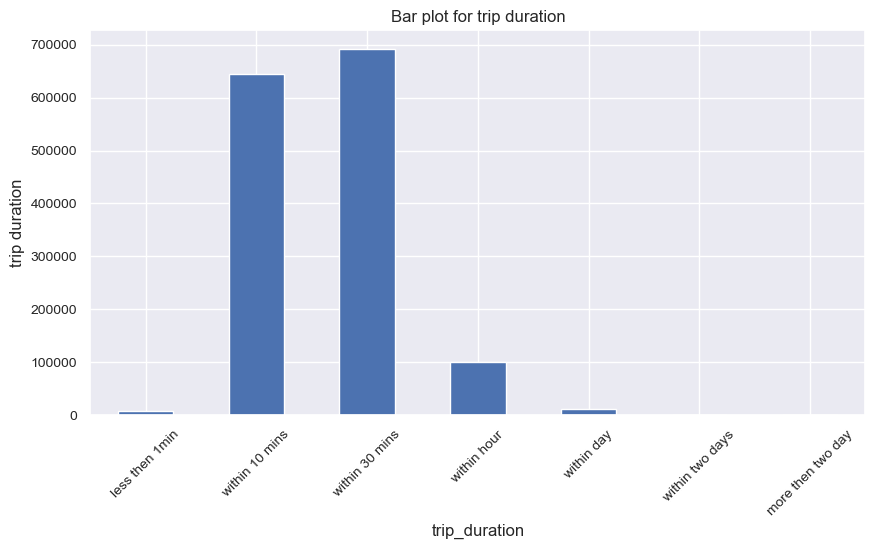

In [36]:
# segregrating the dependent variable into different categories.
plt.figure(figsize=[10,5])
labels=['less then 1min','within 10 mins','within 30 mins','within hour','within day','within two days','more then two day']
nyc_df_train.groupby(pd.cut(nyc_df_train['trip_duration'],bins=[0,60,600,1800,3600,86400,86400*2,10000000],labels=labels))['trip_duration'].count().plot(kind='bar',fontsize=10)
plt.title("Bar plot for trip duration")
plt.ylabel("trip counts")
plt.ylabel("trip duration")
plt.xticks(rotation=45)

In [37]:
numeric_features = nyc_df_train.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

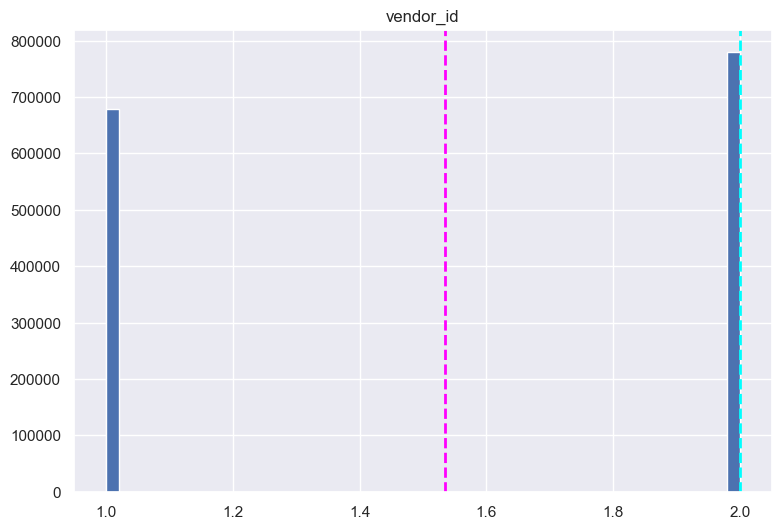

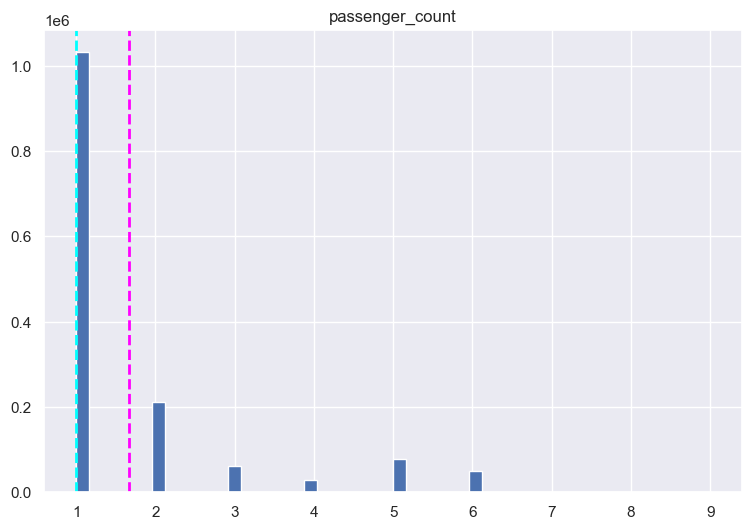

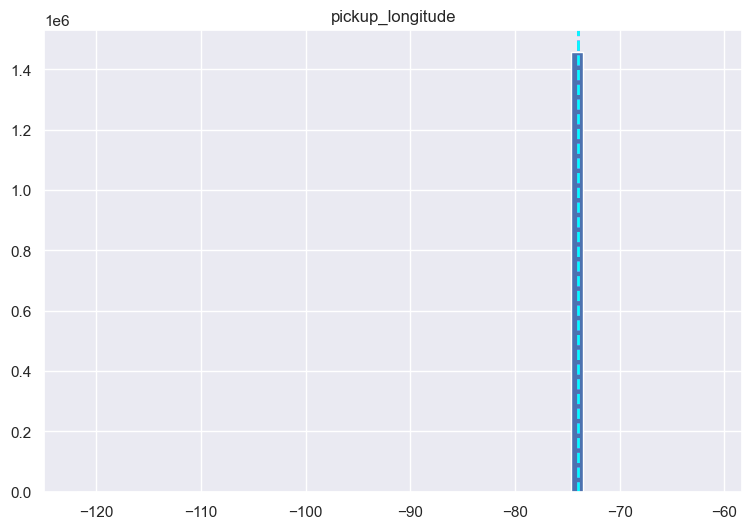

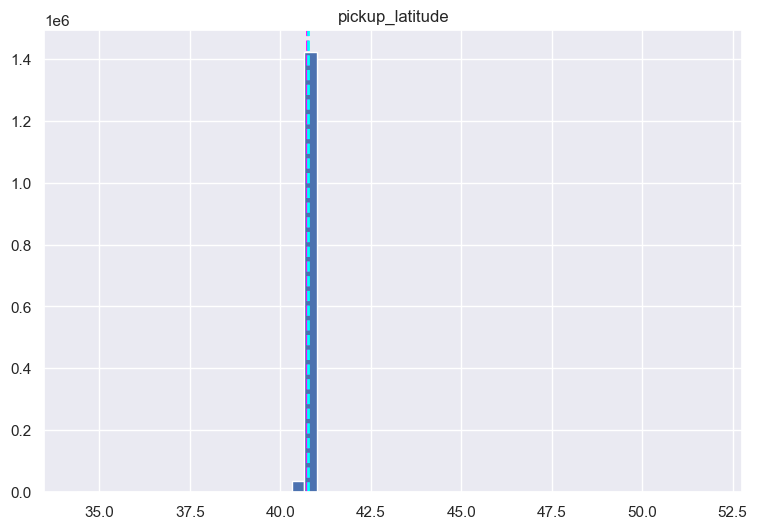

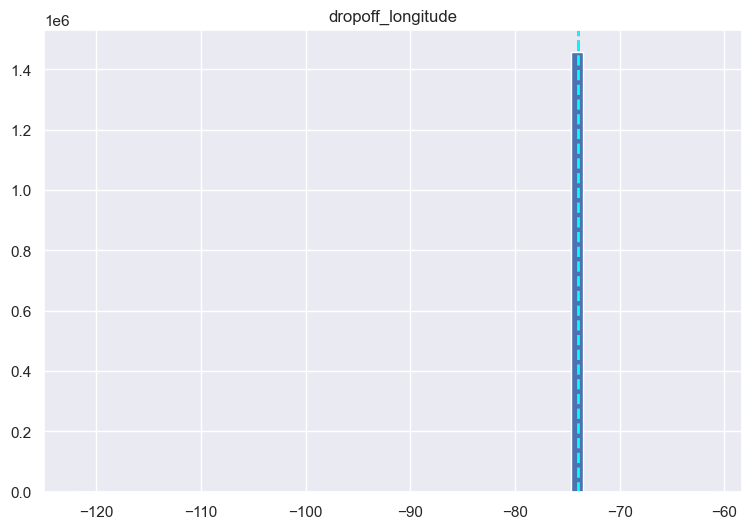

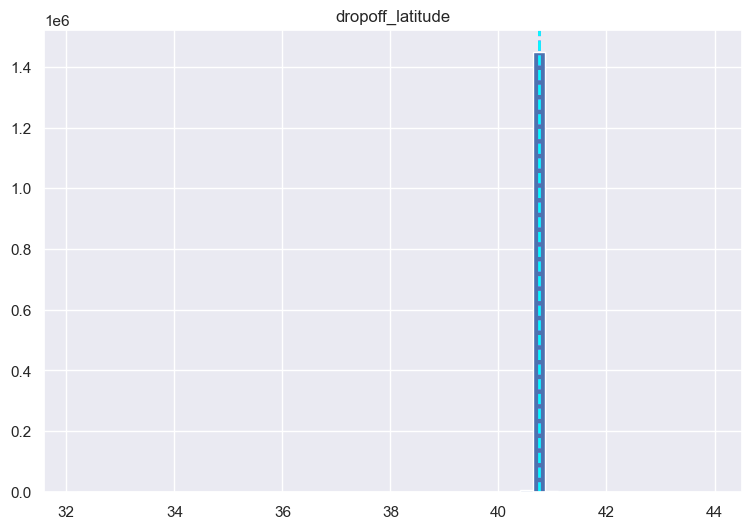

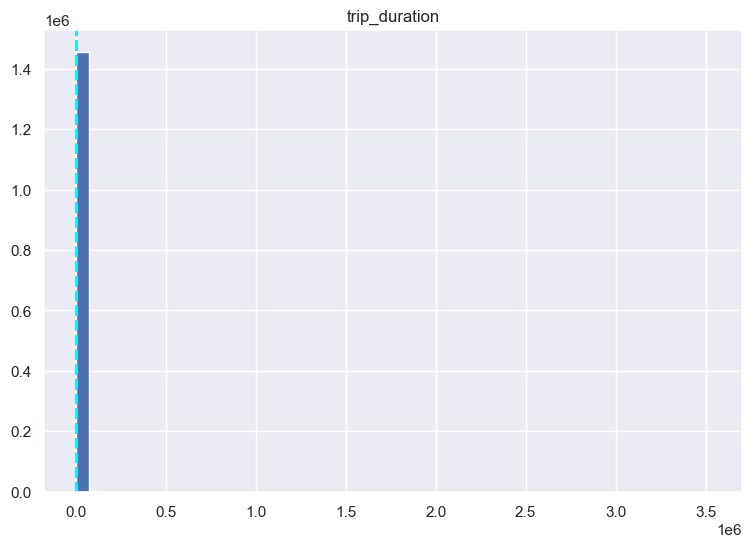

In [38]:
# plot a bar plot for each numerical feature count
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = nyc_df_train[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

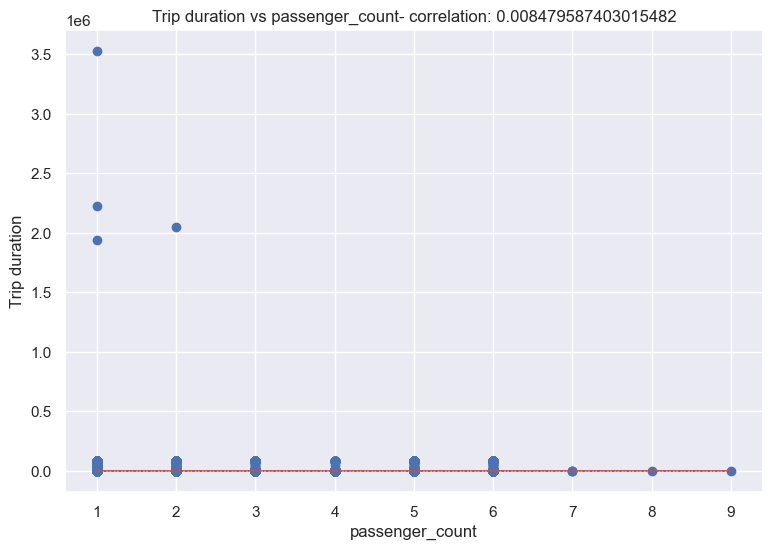

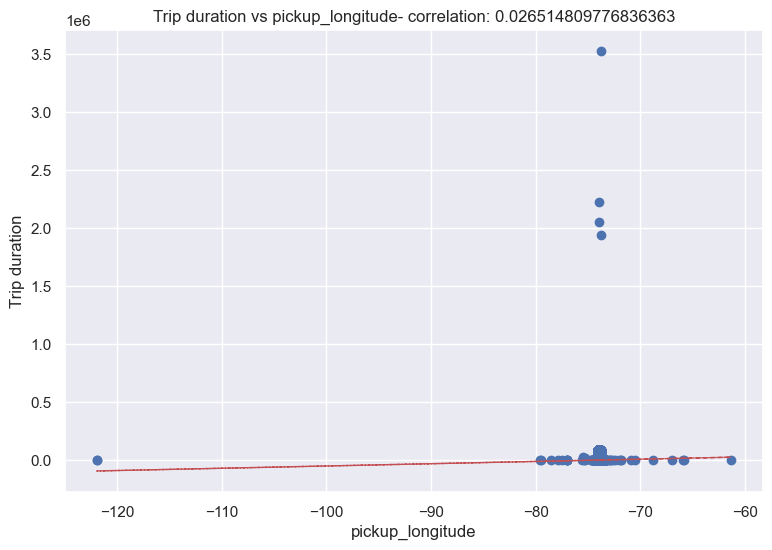

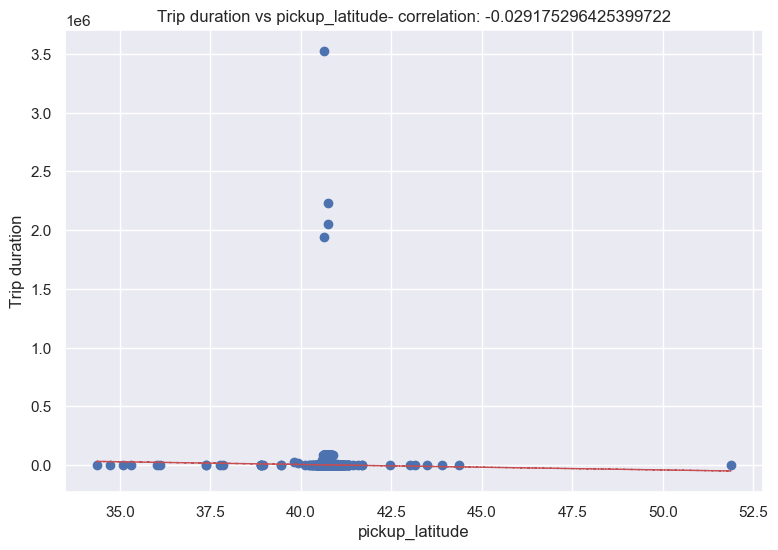

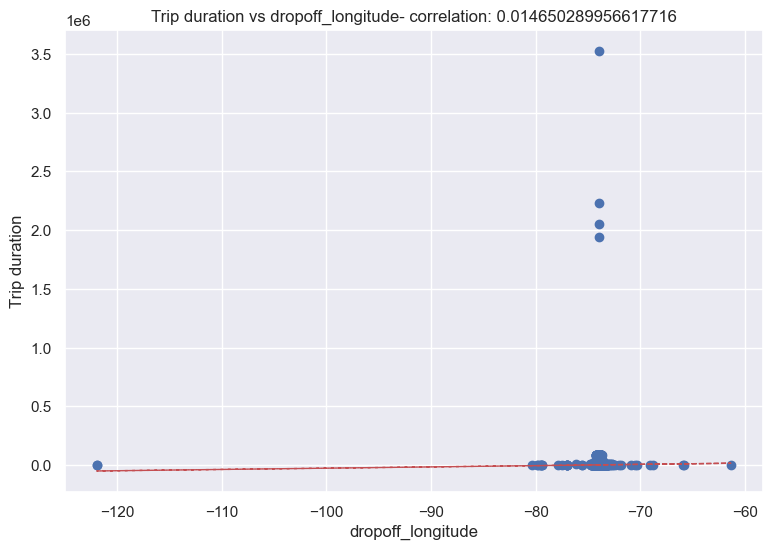

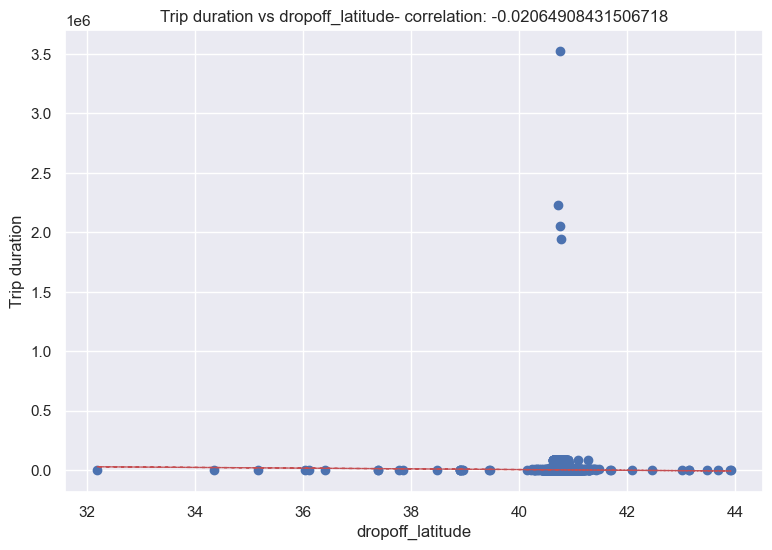

In [41]:
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = nyc_df_train[col]
    label = nyc_df_train['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Trip duration')
    ax.set_title('Trip duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(nyc_df_train[col], nyc_df_train['trip_duration'], 1)
    y_hat = np.poly1d(z)(nyc_df_train[col])

    plt.plot(nyc_df_train[col], y_hat, "r--", lw=1)

plt.show()

(-74.03, -73.75)

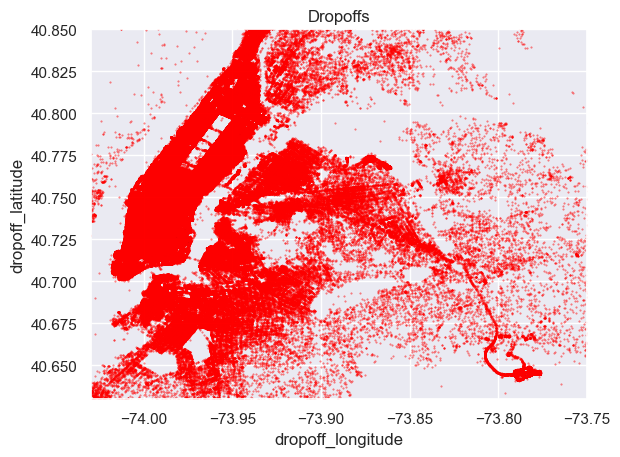

In [42]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

nyc_df_train.plot(kind='scatter', x='dropoff_longitude',y='dropoff_latitude',
          color='Red',
          s=0.2, alpha =.6)
plt.title('Dropoffs')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

(-74.03, -73.75)

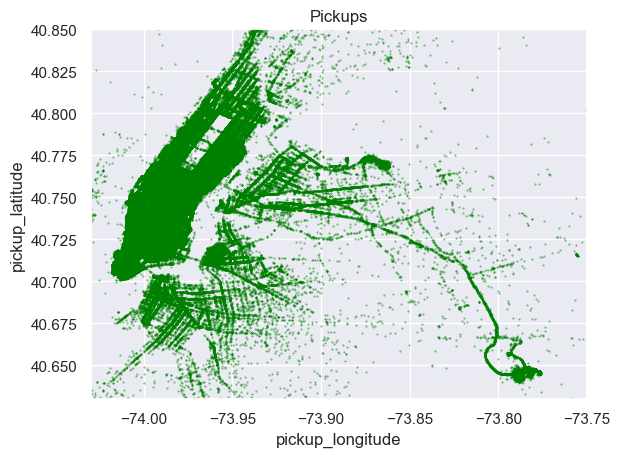

In [43]:
city_long_border = [-74.03, -73.75]
city_lat_border = [40.63,40.85]

nyc_df_train.plot(kind='scatter', x='pickup_longitude',y='pickup_latitude',
          color='green',
          s=0.2, alpha =.6)
plt.title('Pickups')

plt.ylim(city_lat_border)
plt.xlim(city_long_border)

In [44]:
def select_within_boundingbox(df, BB):
    return ((nyc_df["pickup_longitude"] >= BB[0]) & (nyc_df["pickup_longitude"] <= BB[1]) & 
            (nyc_df["pickup_latitude"] >= BB[2]) & (nyc_df["pickup_latitude"] <= BB[3]) &
            (nyc_df["dropoff_longitude"] >= BB[0]) & (nyc_df["dropoff_longitude"] <= BB[1]) &
            (nyc_df["dropoff_latitude"] >= BB[2]) & (nyc_df["dropoff_latitude"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

In [47]:
import folium   

In [48]:
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12, control_scale=True)
nyc

In [49]:
for i in nyc_df_train.index[:100]:
    folium.Marker(location=[nyc_df_train['pickup_latitude'][i],nyc_df_train['pickup_longitude'][i]],icon=folium.Icon(color="blue")).add_to(nyc)
nyc

In [50]:
for i in nyc_df.index[:100]:
    folium.Marker(location=[nyc_df_train['dropoff_latitude'][i],nyc_df_train['dropoff_longitude'][i]],icon=folium.Icon(color="red", icon="info-sign")).add_to(nyc)
nyc

In [51]:
nyc_df_train['pickup_day']=nyc_df_train['pickup_datetime'].dt.day_name()
nyc_df_train['dropoff_day']=nyc_df_train['dropoff_datetime'].dt.day_name()
nyc_df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration pickup_day dropoff_day  
0         40.765602                  N            455     Monday      Monday  
1         40.731152                  N            663     Sunday      Sunday  
2         40.710087                  N           2124    Tuesday     Tuesday  
3         40.706718                  N            429  Wednesday   Wednesday  
4         40.782520                  N            435   Saturday    Saturday

In [52]:
nyc_df_test['pickup_day']=nyc_df_test['pickup_datetime'].dt.day_name()
# nyc_df_test['dropoff_day']=nyc_df_test['dropoff_datetime'].dt.day_name()
nyc_df_test.head()

id  vendor_id     pickup_datetime  passenger_count  \
0  id3004672          1 2016-06-30 23:59:58                1   
1  id3505355          1 2016-06-30 23:59:53                1   
2  id1217141          1 2016-06-30 23:59:47                1   
3  id2150126          2 2016-06-30 23:59:41                1   
4  id1598245          1 2016-06-30 23:59:33                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.988129        40.732029         -73.990173         40.756680   
1        -73.964203        40.679993         -73.959808         40.655403   
2        -73.997437        40.737583         -73.986160         40.729523   
3        -73.956070        40.771900         -73.986427         40.730469   
4        -73.970215        40.761475         -73.961510         40.755890   

  store_and_fwd_flag pickup_day  
0                  N   Thursday  
1                  N   Thursday  
2                  N   Thursday  
3                  N   Thursday  
4                  N   Thursday

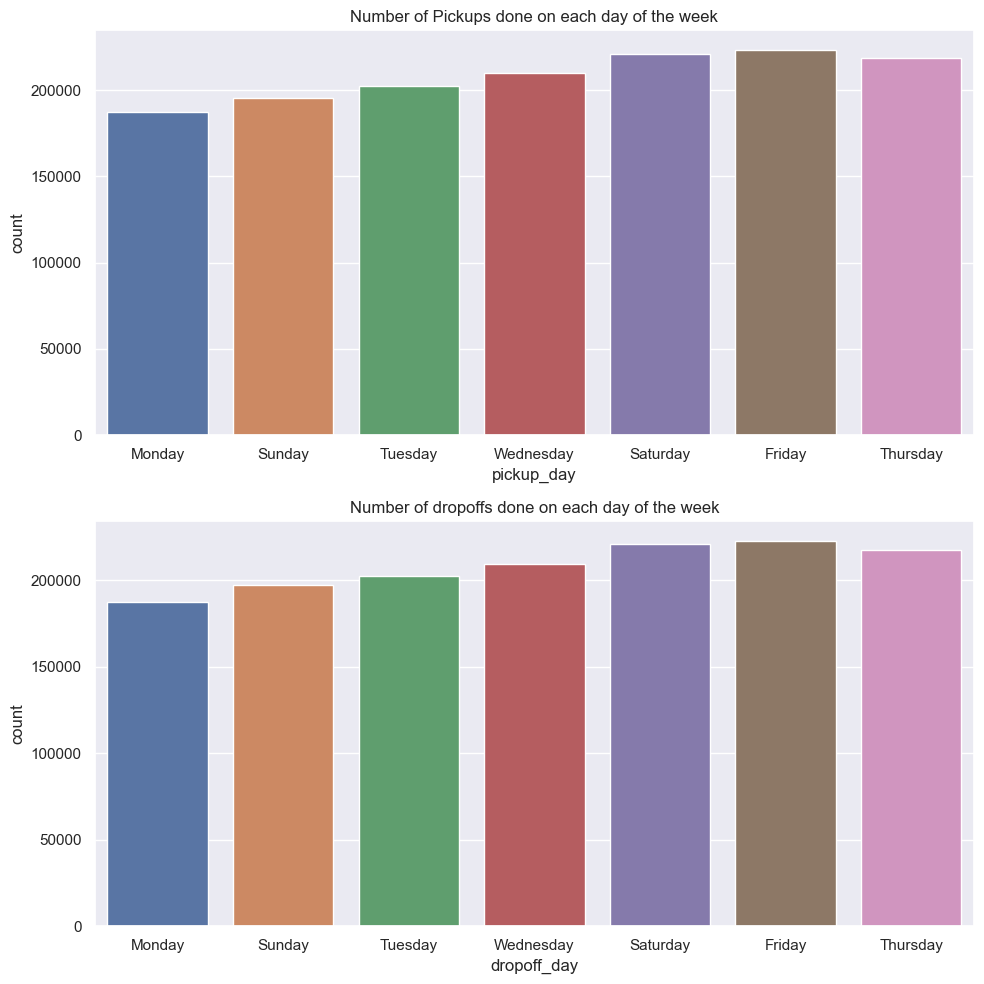

In [53]:
#Number of Pickups and Dropoff on each day of the week
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=nyc_df_train,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=nyc_df_train,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

plt.tight_layout()

In [54]:
bins=np.array([0,1800,3600,5400,7200,90000])
nyc_df_train['duration_time']=pd.cut(nyc_df_train.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

In [55]:
import datetime
def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
nyc_df_train['pickup_timezone']=nyc_df_train['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
nyc_df_train['dropoff_timezone']=nyc_df_train['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [56]:
nyc_df_test['pickup_timezone']=nyc_df_test['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

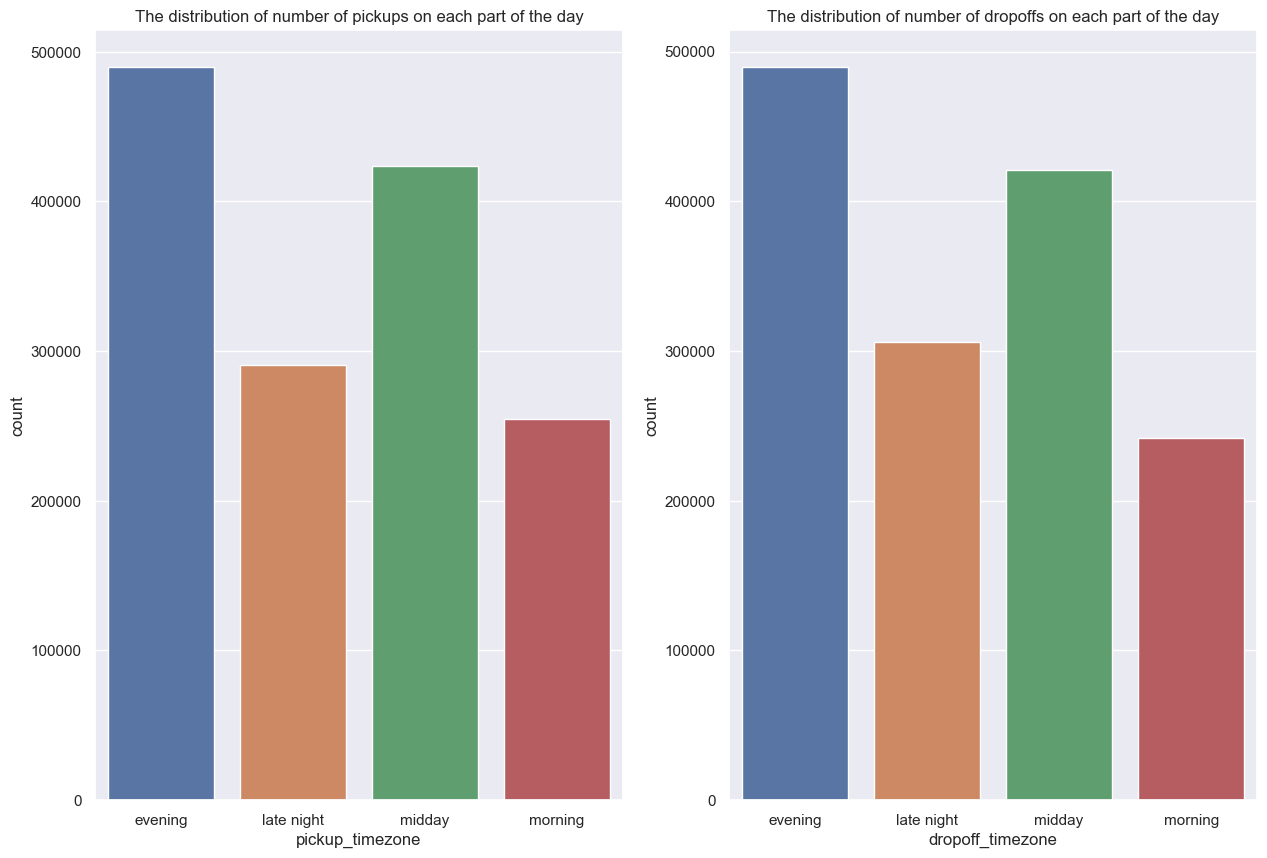

In [57]:
# Distribution of the no of Pickups and Dropoffs in a day
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.countplot(x='pickup_timezone',data=nyc_df_train,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')
sns.countplot(x='dropoff_timezone',data=nyc_df_train,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')
plt.show()

In [60]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [61]:
#Calculate distance and assign new column to the dataframe.
nyc_df_train["distance"] = nyc_df_train.apply(lambda x: calc_distance(x),axis=1)

In [63]:
#Calculate distance and assign new column to the dataframe.
nyc_df_test["distance"] = nyc_df_test.apply(lambda x: calc_distance(x),axis=1)

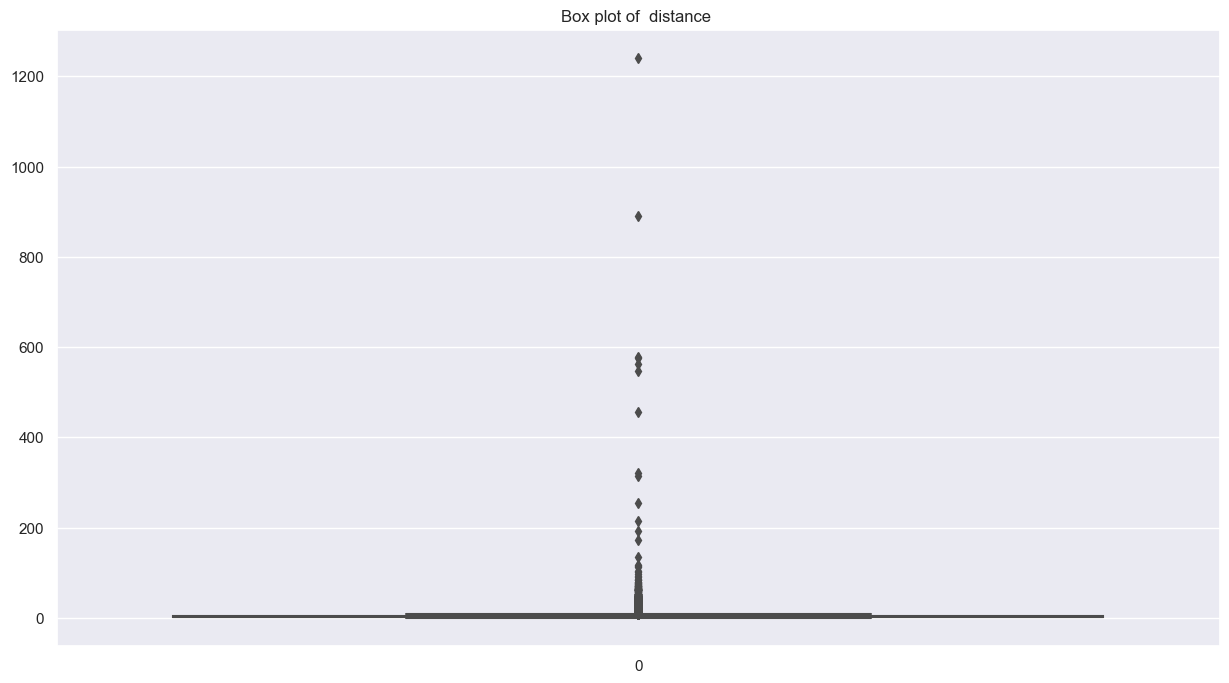

In [65]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=nyc_df_train['distance'], orient="v")

In [66]:
percentile_q1 = np.percentile(nyc_df_train['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(nyc_df_train['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(nyc_df_train['distance'],75)
print(percentile_q3)

1.2319108384989683
2.0937848447236194
3.875450446022868


In [67]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.7333985727868804
Upper limit for outlier  : 7.840759857308717


In [68]:
nyc_df_train=nyc_df_train[nyc_df_train['distance']>lower_limit_outlier]
nyc_df_train=nyc_df_train[nyc_df_train['distance']<upper_limit_outlier]

In [69]:
nyc_df_train.shape


(1317917, 17)

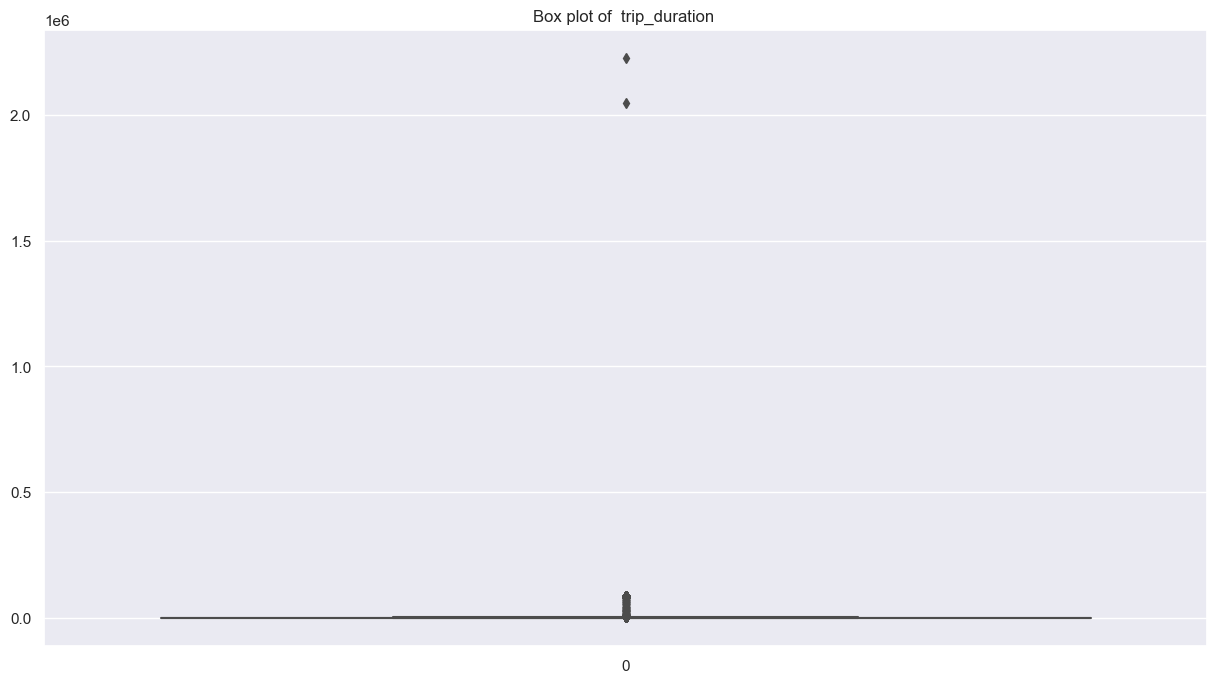

In [70]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=nyc_df_train['trip_duration'], orient="v")

In [71]:
percentile_q1_trip_duration = np.percentile(nyc_df_train['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(nyc_df_train['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(nyc_df_train['trip_duration'],75)
print(percentile_q3_trip_duration)
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)
nyc_df_train=nyc_df_train[nyc_df_train['trip_duration']>0]
nyc_df_train=nyc_df_train[nyc_df_train['trip_duration']<upper_limit_outlier_trip_duration]
nyc_df_train.shape

373.0
605.0
931.0
lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


(1277345, 17)

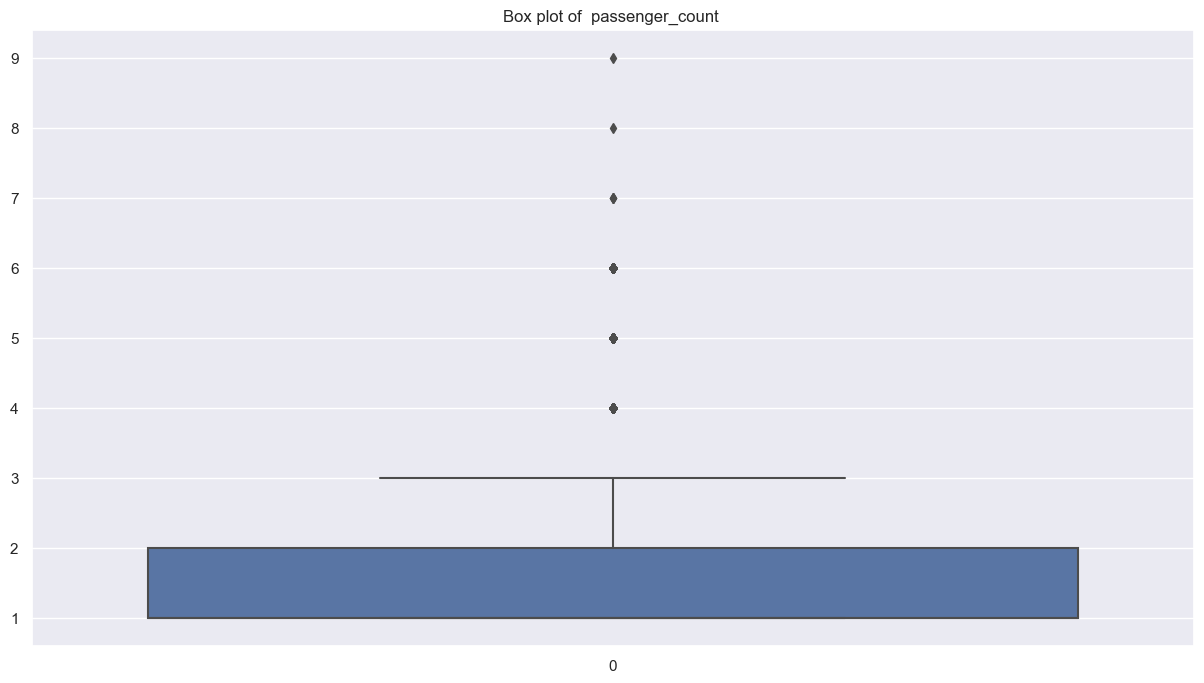

In [73]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=nyc_df_train['passenger_count'])

In [74]:
percentile_q1_passenger_count = np.percentile(nyc_df_train['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(nyc_df_train['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(nyc_df_train['passenger_count'],75)
print(percentile_q3_passenger_count)
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)
nyc_df_train=nyc_df_train[nyc_df_train['passenger_count']>0]
nyc_df_train=nyc_df_train[nyc_df_train['passenger_count']<upper_limit_outlier_passenger_count]
nyc_df_train.shape

#convert dattime in "%Y-%m-%d %H:%M:%S" format
nyc_df_train["pickup_datetime"] = pd.to_datetime(nyc_df_train["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

1.0
1.0
2.0
lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [75]:
nyc_df_train['Day']=nyc_df_train['pickup_datetime'].dt.day_name()
#Calculate and assign new columns to the dataframe such as year,
#month ,day_num,hour and minute which will help us to gain more insights from the data.
nyc_df_train["year"] = nyc_df_train["pickup_datetime"].apply(lambda x: x.year)
nyc_df_train["month"] = nyc_df_train["pickup_datetime"].apply(lambda x: x.month)
nyc_df_train["day_num"] = nyc_df_train["pickup_datetime"].apply(lambda x: x.day)
nyc_df_train["hour"] = nyc_df_train["pickup_datetime"].apply(lambda x: x.hour)
nyc_df_train["minute"] = nyc_df_train["pickup_datetime"].apply(lambda x: x.minute)

In [76]:
nyc_df_train['trip_duration_hour']=nyc_df_train['trip_duration']/3600
nyc_df_train['log_distance']=np.log(nyc_df_train.distance)
nyc_df_train['log_trip_duration']=np.log(nyc_df_train.trip_duration_hour)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

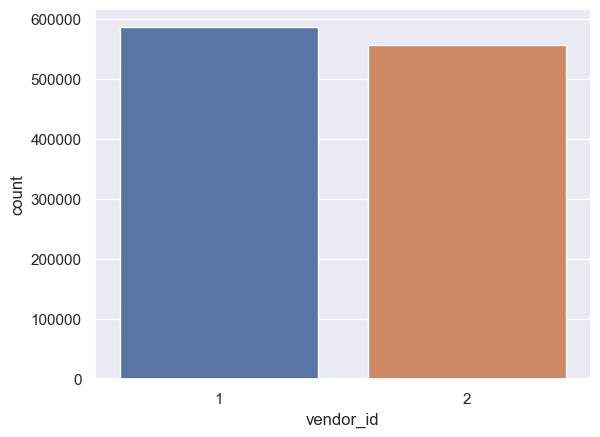

In [77]:
#Distribution of the vendor id for the taxi trip
sns.countplot(x='vendor_id',data=nyc_df_train)

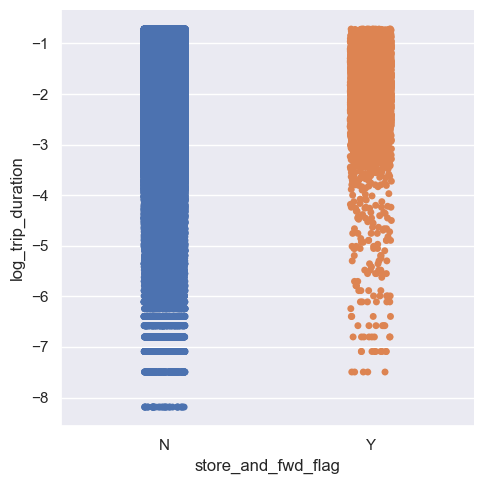

In [78]:
#Distribution of the Store and Fwd flag
sns.catplot(x="store_and_fwd_flag", y="log_trip_duration",kind="strip",data=nyc_df_train)

<AxesSubplot:xlabel='distance', ylabel='trip_duration'>

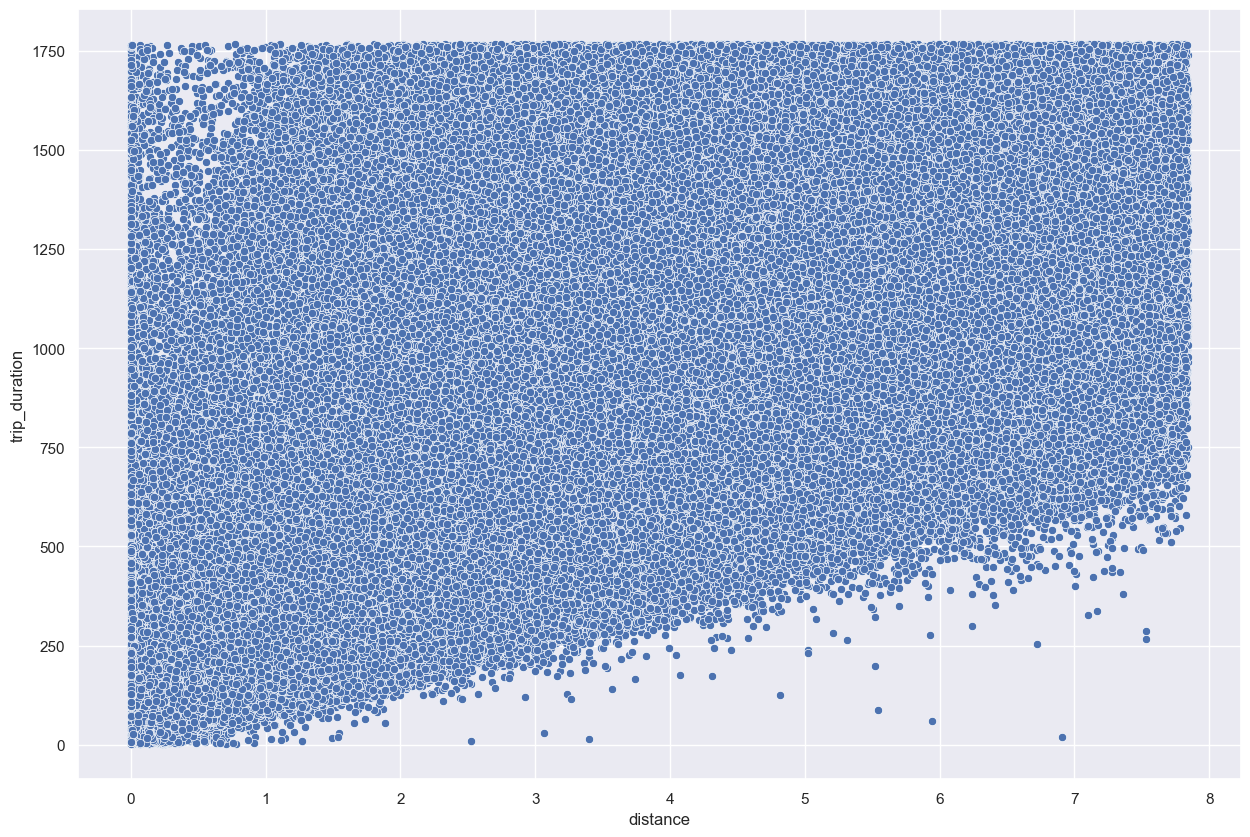

In [79]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='distance',y='trip_duration',data=nyc_df_train)

<AxesSubplot:xlabel='log_distance', ylabel='log_trip_duration'>

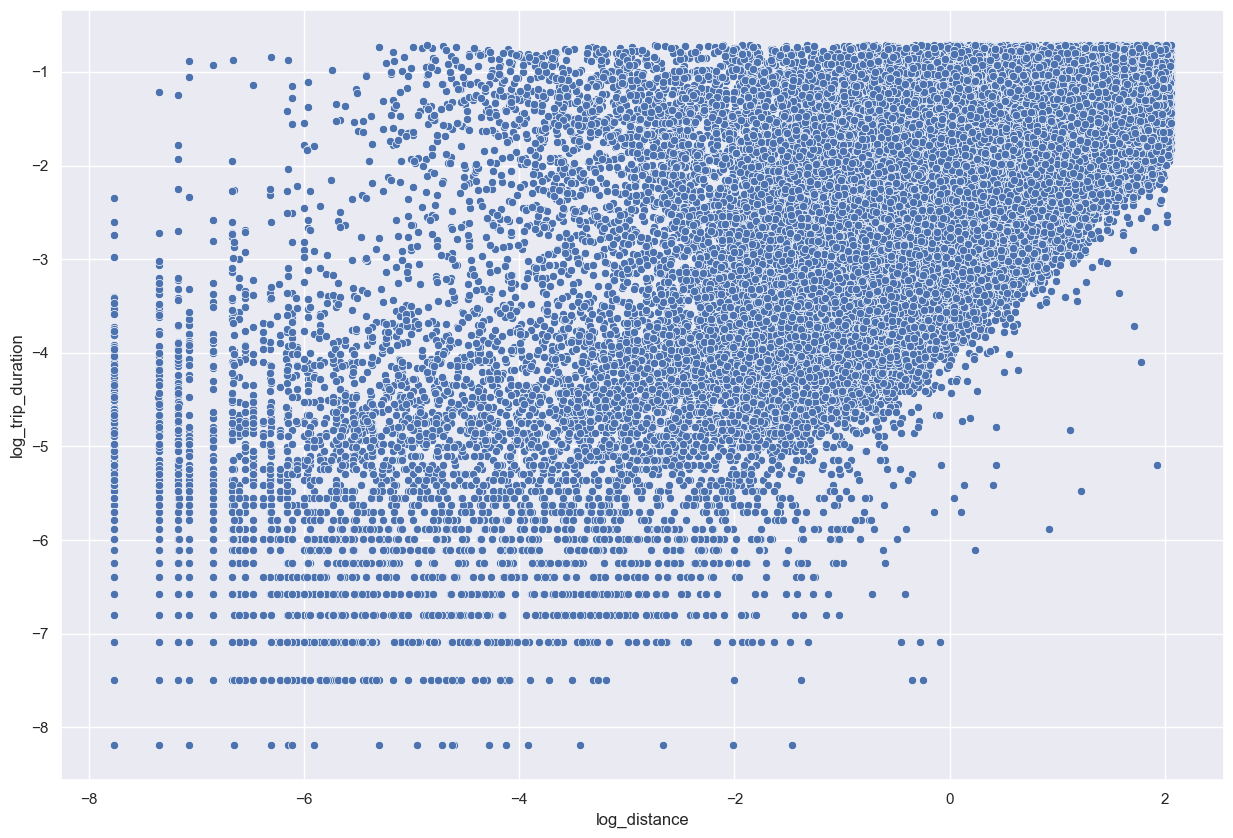

In [80]:
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x='log_distance',y='log_trip_duration',data=nyc_df_train)

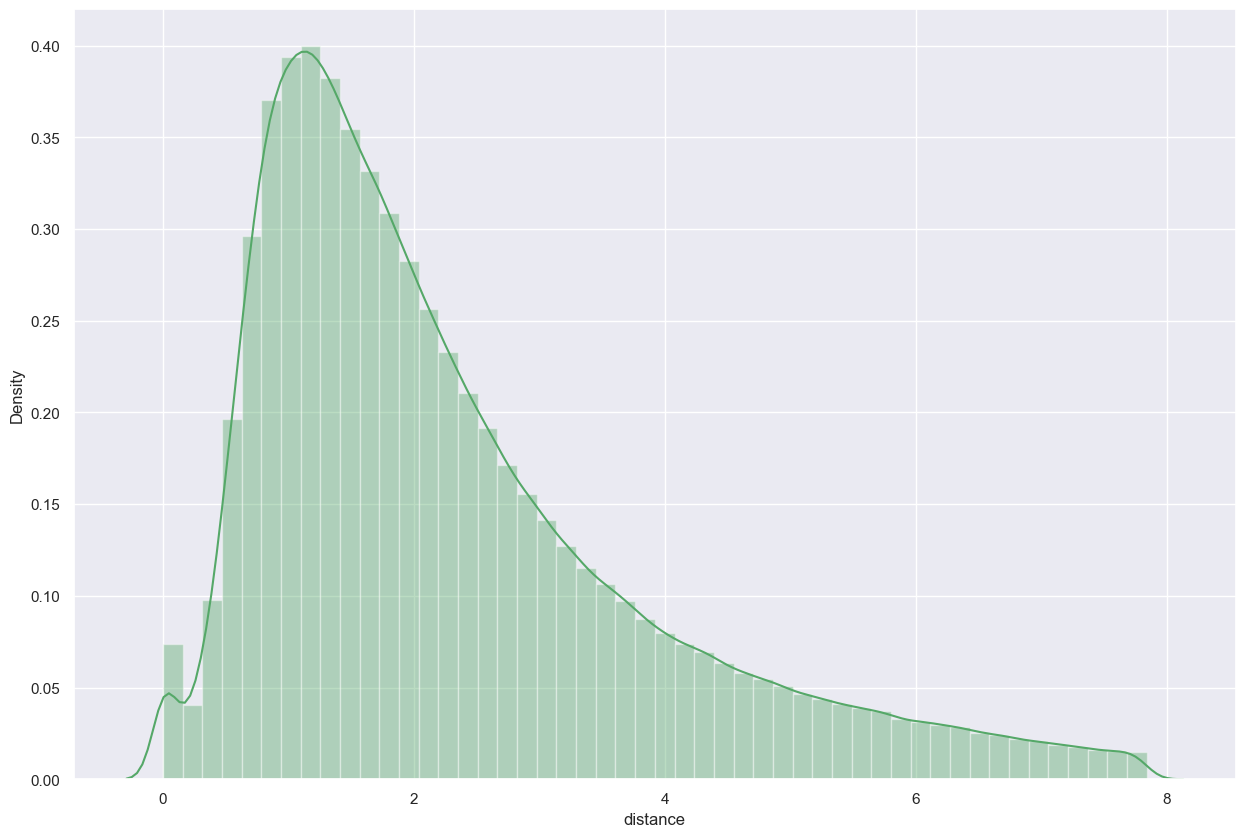

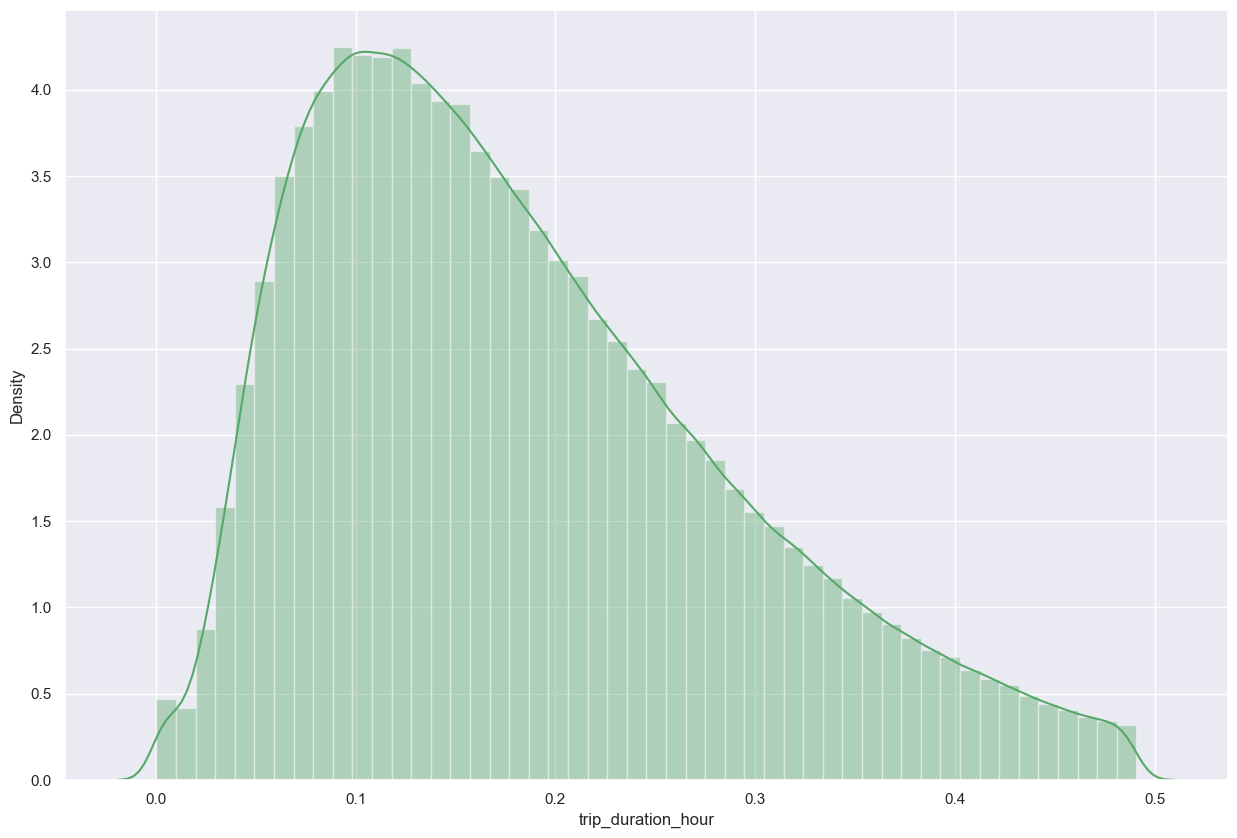

In [81]:
sample=['distance','trip_duration_hour']
for i in sample:
    plt.figure(figsize=(15,10))
    sns.distplot(nyc_df_train[i],color="g")

In [83]:
#Dummify all the categorical features like "store_and_fwd_flag, Day" except the label i.e. "trip_duration"
nyc_df_train= pd.get_dummies(nyc_df_train, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [84]:
#Feature for the Machine learning models
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [85]:
newdata=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday','trip_duration_hour']
trip_data=nyc_df_train[newdata]

In [86]:
#For Standarization  apply z-score
from scipy.stats import zscore
#Train test split
X = nyc_df[features].apply(zscore)[:100000]
y=nyc_df['trip_duration_hour'][:100000]

In [87]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [89]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(80000, 19) (80000,)
(20000, 19) (20000,)


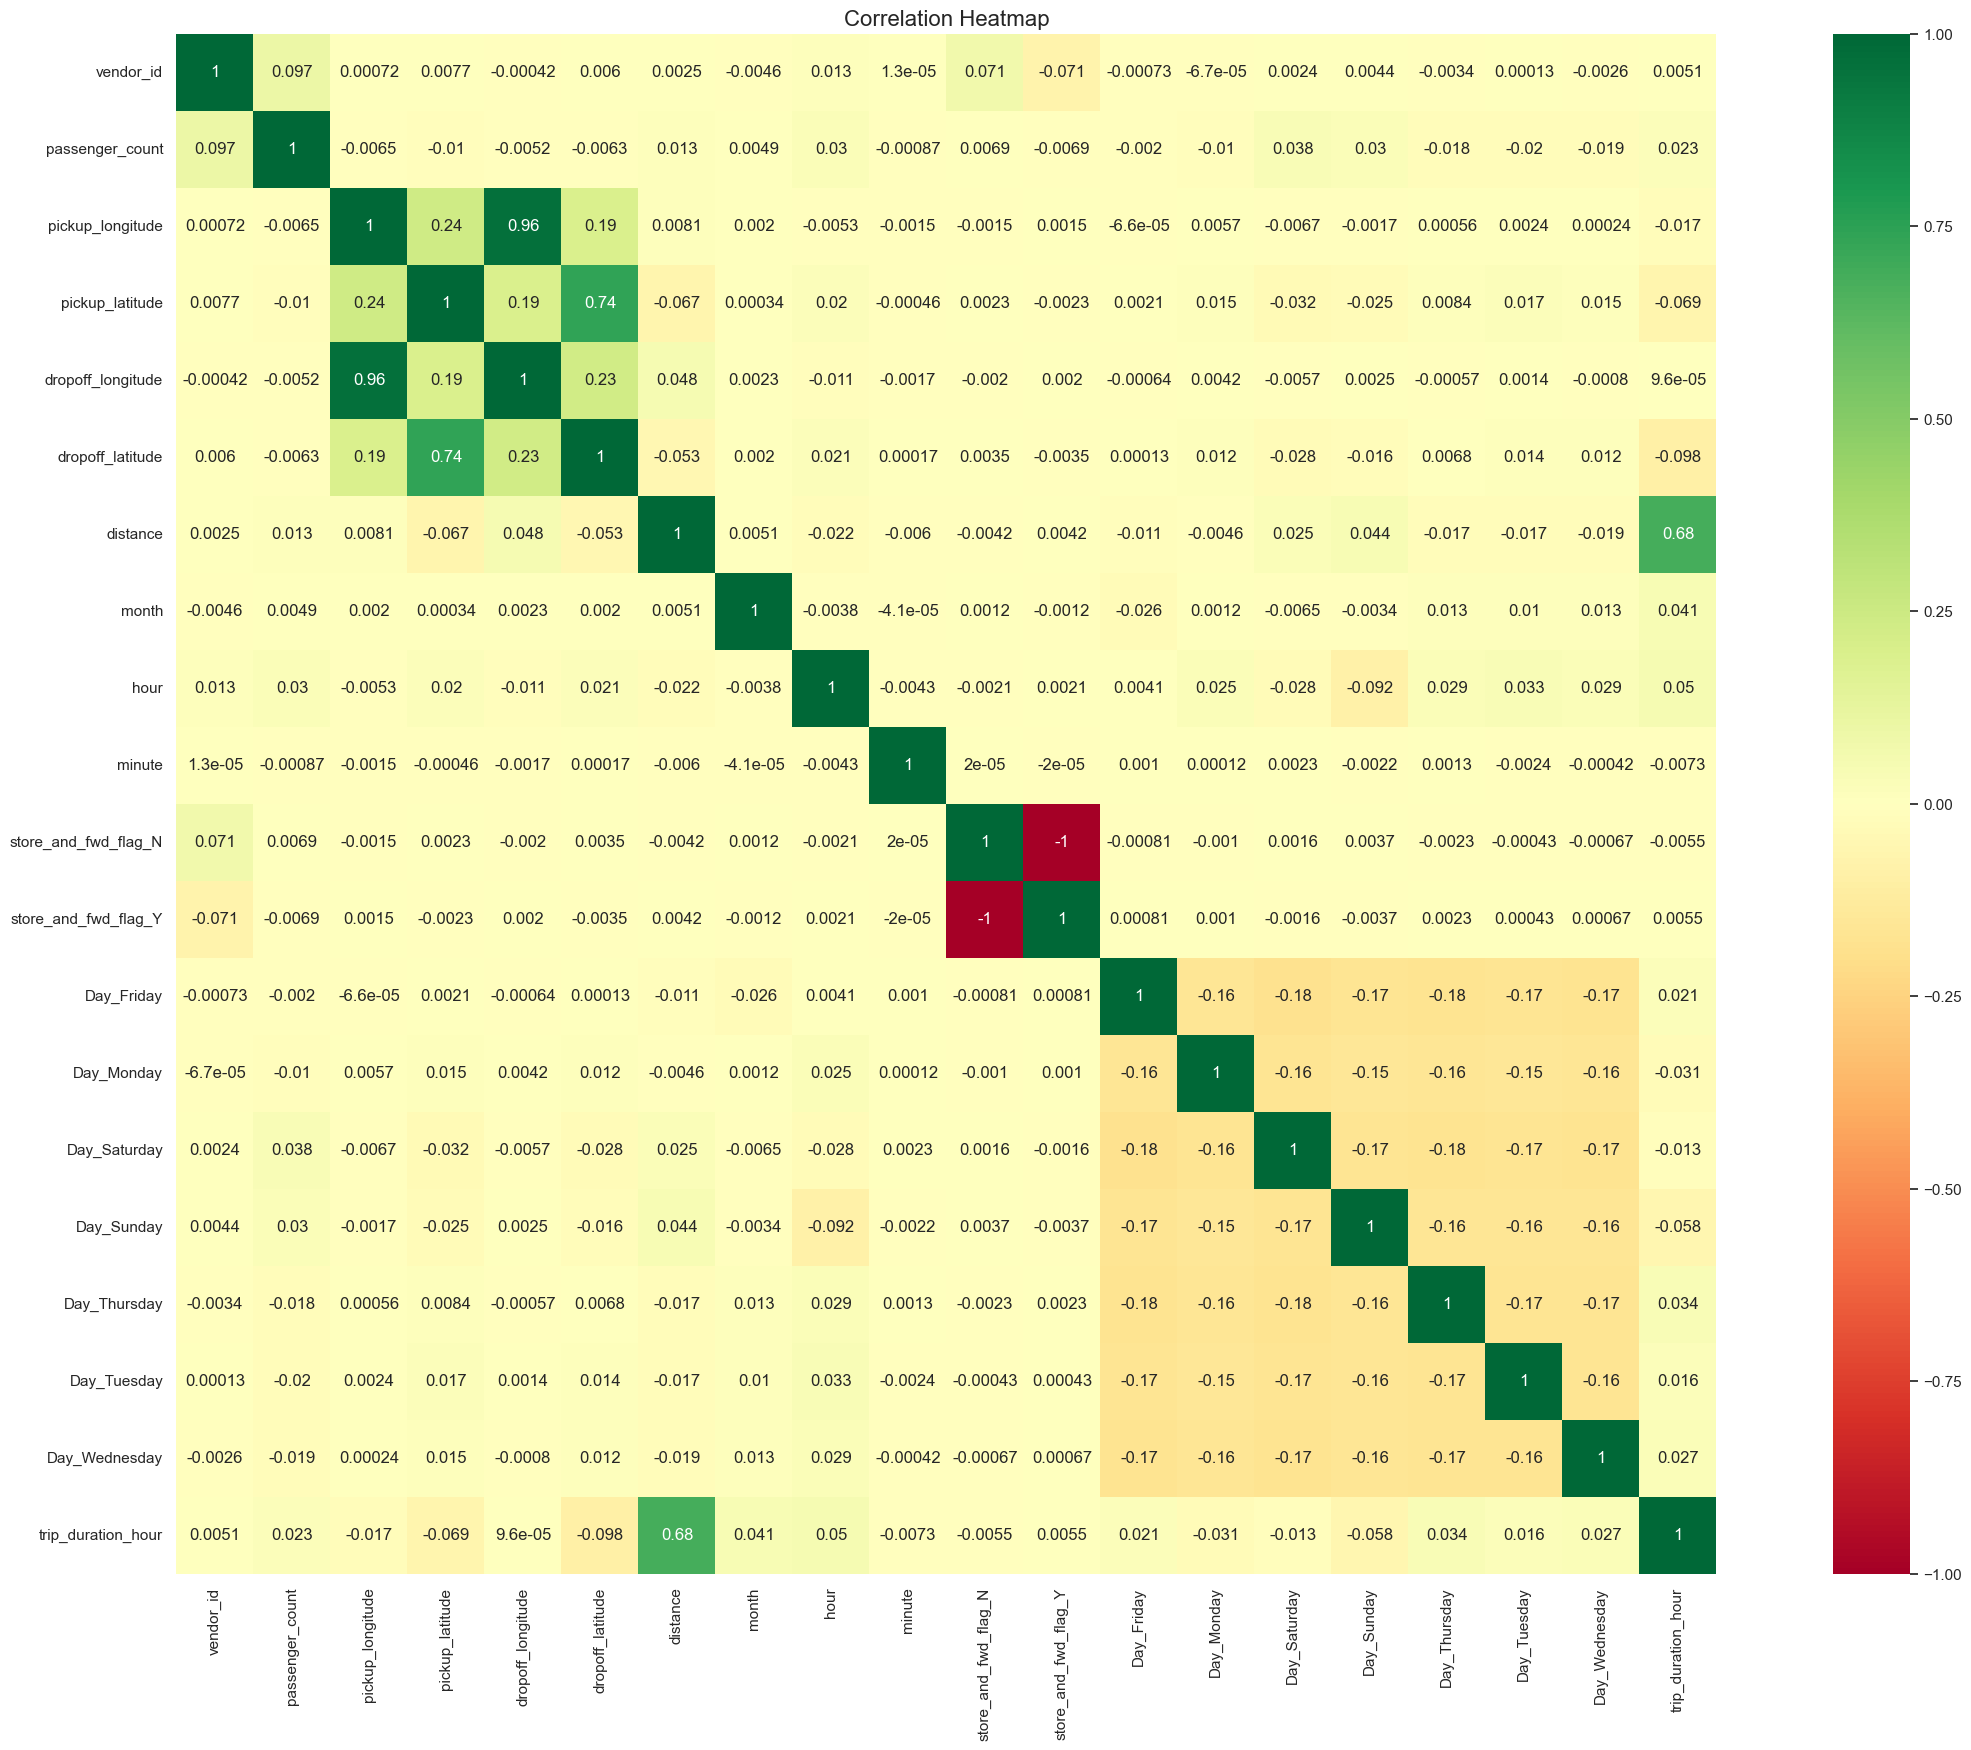

In [90]:
plt.figure (figsize= (30,20))

sns.heatmap(trip_data.corr(), cmap='RdYlGn', annot=True,vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [93]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
    ''' Take the different set of parameter and prints evaluation metrics '''
    MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
    RMSE=(np.sqrt(MSE))
    R2=(r2_score(y_true=yt,y_pred=yp))
    Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
    if disp=="on":
        print("MSE :",MSE,"RMSE :", RMSE)
        print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
    plt.figure(figsize=(18,6))
    plt.plot((yp)[:100]) 
    plt.plot((np.array(yt)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.title('Actual and Predicted Time Duration')


  
    return (MSE,RMSE,R2,Adjusted_R2) 

In [94]:
# Linear Regression
# Instance the linear regression object
reg = LinearRegression().fit(X_train, y_train)

In [95]:
reg.score(X_train, y_train)


0.49775430320840164

In [96]:
y_pred_train = reg.predict(X_train)

In [97]:
y_pred_test = reg.predict(X_test)


MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49775430320840164 Adjusted R2 : 0.4976349900271183


(0.0055, 0.07416198487095663, 0.49775430320840164, 0.4976349900271183)

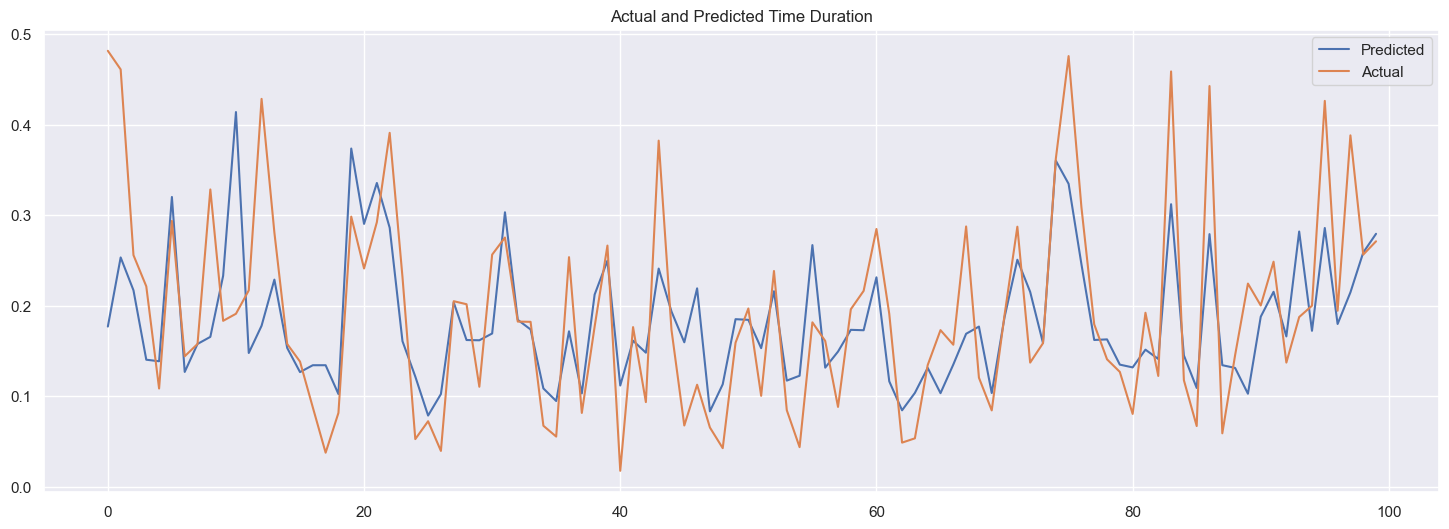

In [98]:
#Evaluation metrics for Train set
EvaluationMetric(X_train,y_train,y_pred_train)

MSE : 0.0055 RMSE : 0.07416198487095663
R2 : 0.49588612070583715 Adjusted R2 : 0.4954067331329348


(0.0055, 0.07416198487095663, 0.49588612070583715, 0.4954067331329348)

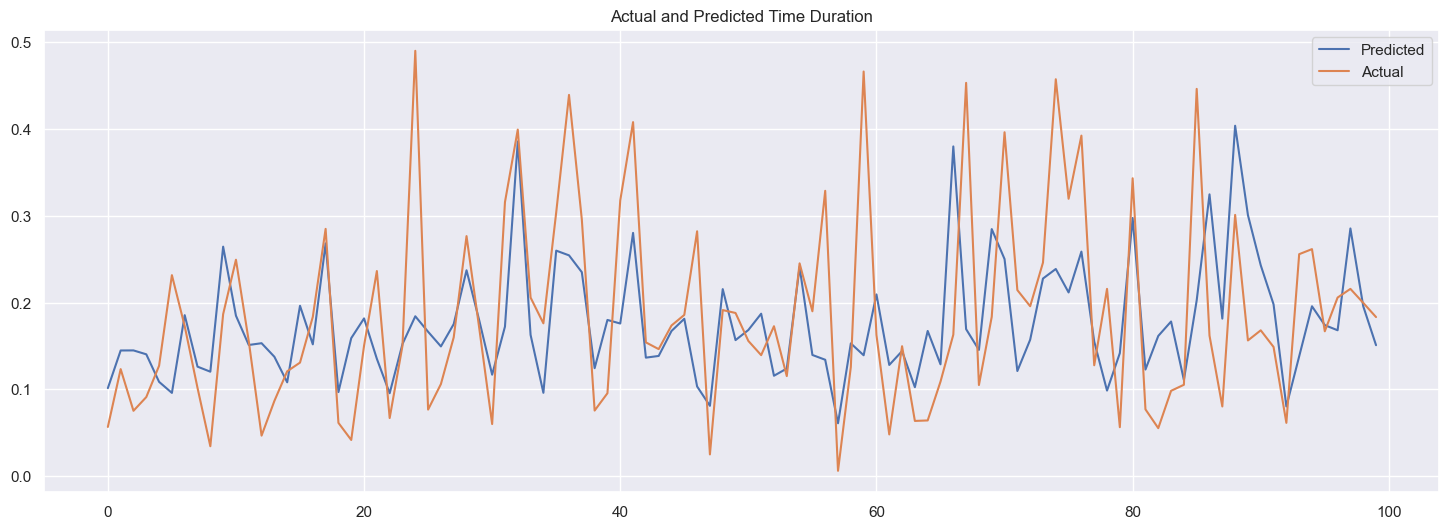

In [99]:
#Evaluation metrics for Test set
EvaluationMetric(X_test,y_test,y_pred_test)

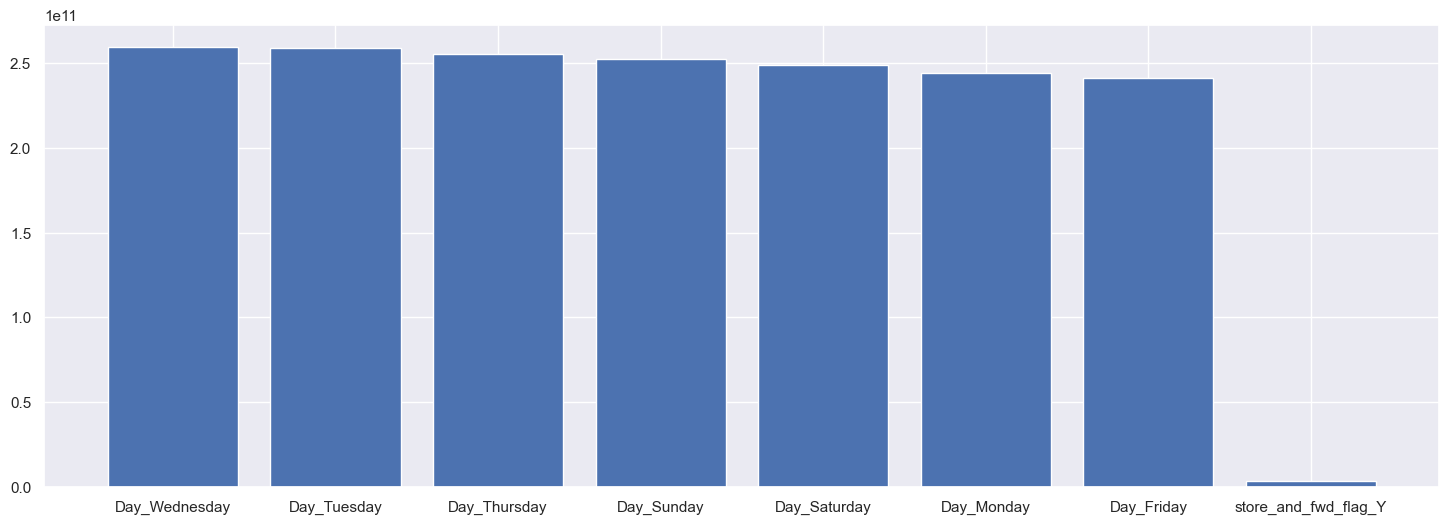

In [100]:
#Feature Importances for Linear Regression

plt.figure(figsize=(18,6))

importance=reg.coef_
importance=np.sort(importance)
feature=features
indices=np.argsort(importance)
indices=indices[:10:-1]
#plotting the features and their score in ascending order
sns.set_style("darkgrid")
plt.bar(range(len(indices)),importance[indices])
plt.xticks(range(len(indices)),[feature[i] for i in indices])
plt.show()

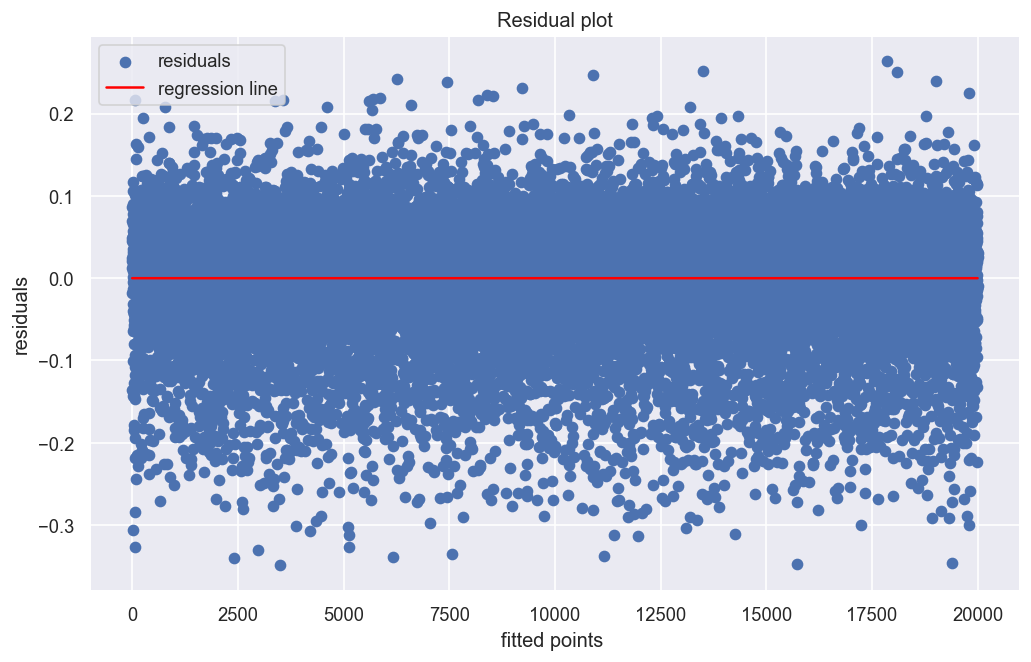

In [101]:
residuals=y_pred_test-y_test

plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,len(y_test))
k = [0 for i in range(0,len(y_test))]
plt.scatter( f, residuals, label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()